# **Testing ExchangeRate API**

In [ ]:
import requests

# API_KEY = "YOUR_API_KEY"

latest_url = "http://api.exchangerate.host/live?access_key=YOUR_API_KEY"

response = requests.get(latest_url)
data = response.json()
print(data)

{'success': True, 'terms': 'https://currencylayer.com/terms', 'privacy': 'https://currencylayer.com/privacy', 'timestamp': 1755600018, 'source': 'USD', 'quotes': {'USDAED': 3.672499, 'USDAFN': 69.499706, 'USDALL': 83.804736, 'USDAMD': 383.270429, 'USDANG': 1.789783, 'USDAOA': 917.000039, 'USDARS': 1292.733499, 'USDAUD': 1.540357, 'USDAWG': 1.8005, 'USDAZN': 1.696279, 'USDBAM': 1.673777, 'USDBBD': 2.018408, 'USDBDT': 121.455376, 'USDBGN': 1.675275, 'USDBHD': 0.376981, 'USDBIF': 2960, 'USDBMD': 1, 'USDBND': 1.281889, 'USDBOB': 6.922521, 'USDBRL': 5.438102, 'USDBSD': 0.999649, 'USDBTC': 8.653738e-06, 'USDBTN': 87.28295, 'USDBWP': 13.40305, 'USDBYN': 3.345371, 'USDBYR': 19600, 'USDBZD': 2.007942, 'USDCAD': 1.38129, 'USDCDF': 2895.000267, 'USDCHF': 0.805135, 'USDCLF': 0.024577, 'USDCLP': 964.160393, 'USDCNY': 7.184895, 'USDCNH': 7.18318, 'USDCOP': 4015, 'USDCRC': 505.173255, 'USDCUC': 1, 'USDCUP': 26.5, 'USDCVE': 94.75016, 'USDCZK': 20.92498, 'USDDJF': 177.720291, 'USDDKK': 6.38623, 'USDDOP

In [106]:
if data.get("success"):
    quotes = data["quotes"]
    usd_inr = quotes["USDINR"]
    usd_eur = quotes["USDEUR"]
    usd_gbp = quotes["USDGBP"]

    print("1 USD → INR:", usd_inr)
    print("1 USD → EUR:", usd_eur)
    print("1 USD → GBP:", usd_gbp)
else:
    print("Error:", data)

1 USD → INR: 87.00395
1 USD → EUR: 0.85552
1 USD → GBP: 0.739305


# **FastForex API**

In [ ]:
import requests

API_KEY = "YOUR_API_KEY"
url = f"https://api.fastforex.io/fetch-all?api_key={API_KEY}"
data = requests.get(url).json()

print("Base:", data["base"])
print("INR rate:", data["results"].get("INR"))

Base: USD
INR rate: 86.96286


# **USD to INR**

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = "YOUR_API_KEY"

url = (
    f"https://api.fastforex.io/time-series"
    f"?api_key={API_KEY}"
    f"&from=USD&to=INR"
    f"&start_date=2025-08-01"
)

response = requests.get(url)
data_usd = response.json()

print(data_usd)

{'start': '2025-08-05', 'end': '2025-08-18', 'interval': 'P1D', 'base': 'USD', 'results': {'INR': {'2025-08-05': 87.75453, '2025-08-06': 87.71934, '2025-08-07': 87.37252, '2025-08-08': 87.4216, '2025-08-09': 87.65625, '2025-08-10': 87.37038, '2025-08-11': 87.57579, '2025-08-12': 87.61141, '2025-08-13': 87.40579, '2025-08-14': 87.57461, '2025-08-15': 87.45427, '2025-08-16': 87.46615, '2025-08-17': 87.46615, '2025-08-18': 87.34037}}, 'ms': 6}


In [79]:
inr_rates_usd = data_usd["results"]["INR"]
dates_usd = list(inr_rates_usd.keys())
rates_usd = list(inr_rates_usd.values())

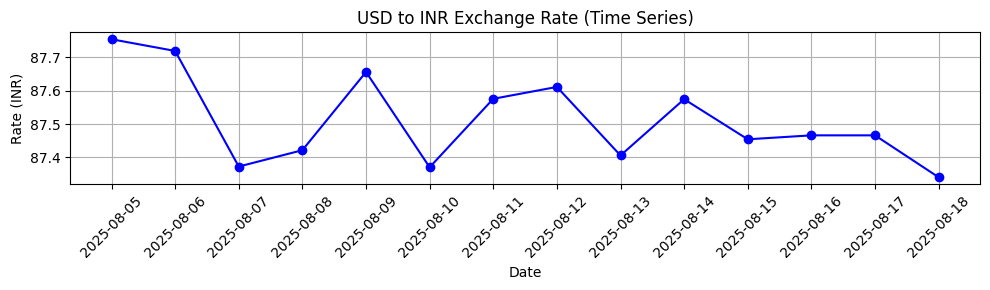

In [96]:
plt.figure(figsize=(10, 3))
plt.plot(dates_usd, rates_usd, marker="o", linestyle="-", color="blue")
plt.xticks(rotation=45)
plt.title("USD to INR Exchange Rate (Time Series)")
plt.xlabel("Date")
plt.ylabel("Rate (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **EUR to INR**

In [81]:
url = (
    f"https://api.fastforex.io/time-series"
    f"?api_key={API_KEY}"
    f"&from=EUR&to=INR"
    f"&start_date=2025-08-01"
)

response = requests.get(url)
data_eur = response.json()

print(data_eur)

{'start': '2025-08-05', 'end': '2025-08-18', 'interval': 'P1D', 'base': 'EUR', 'results': {'INR': {'2025-08-05': 101.49876, '2025-08-06': 101.9958, '2025-08-07': 101.56094, '2025-08-08': 101.92488, '2025-08-09': 102.05882, '2025-08-10': 101.75926, '2025-08-11': 101.60507, '2025-08-12': 102.13871, '2025-08-13': 102.45335, '2025-08-14': 102.10484, '2025-08-15': 102.45936, '2025-08-16': 102.43437, '2025-08-17': 102.43437, '2025-08-18': 101.89735}}, 'ms': 5}


In [83]:
inr_rates_eur = data_eur["results"]["INR"]
dates_eur = list(inr_rates_eur.keys())
rates_eur = list(inr_rates_eur.values())

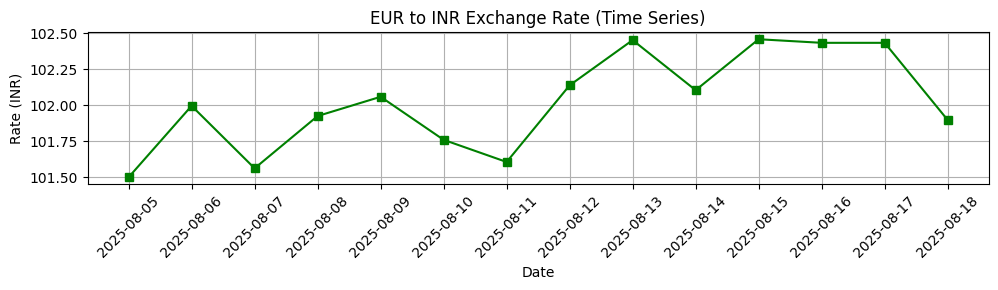

In [98]:
plt.figure(figsize=(10, 3))
plt.plot(dates_eur, rates_eur, marker="s", linestyle="-", color= "green")
plt.xticks(rotation=45)
plt.title("EUR to INR Exchange Rate (Time Series)")
plt.xlabel("Date")
plt.ylabel("Rate (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **GBP to INR**

In [85]:
url = (
    f"https://api.fastforex.io/time-series"
    f"?api_key={API_KEY}"
    f"&from=GBP&to=INR"
    f"&start_date=2025-08-01"
)

response = requests.get(url)
data_gbp = response.json()

print(data_gbp)

{'start': '2025-08-05', 'end': '2025-08-18', 'interval': 'P1D', 'base': 'GBP', 'results': {'INR': {'2025-08-05': 116.617, '2025-08-06': 116.929, '2025-08-07': 117.115, '2025-08-08': 117.499, '2025-08-09': 117.881, '2025-08-10': 117.535, '2025-08-11': 117.426, '2025-08-12': 118.151, '2025-08-13': 118.642, '2025-08-14': 118.703, '2025-08-15': 118.567, '2025-08-16': 118.535, '2025-08-17': 118.535, '2025-08-18': 118.044}}, 'ms': 5}


In [86]:
inr_rates_gbp = data_gbp["results"]["INR"]
dates_gbp = list(inr_rates_gbp.keys())
rates_gbp = list(inr_rates_gbp.values())

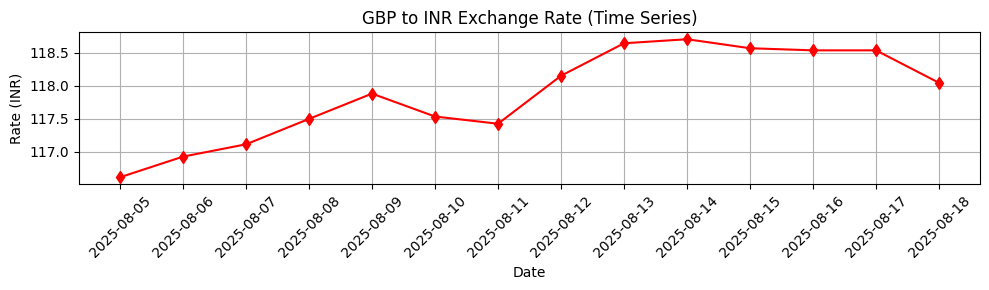

In [101]:
plt.figure(figsize=(10, 3))
plt.plot(dates_gbp, rates_gbp, marker="d", linestyle="-", color= "red")
plt.xticks(rotation=45)
plt.title("GBP to INR Exchange Rate (Time Series)")
plt.xlabel("Date")
plt.ylabel("Rate (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **USD, EUR and GBP to INR**

In [90]:
currencies = ["USD", "EUR", "GBP"]
results = {}

for base in currencies:
    url = (
        f"https://api.fastforex.io/time-series"
        f"?api_key={API_KEY}"
        f"&from={base}&to=INR"
        f"&start_date=2025-08-05"
    )
    response = requests.get(url).json()
    results[base] = response["results"]["INR"]

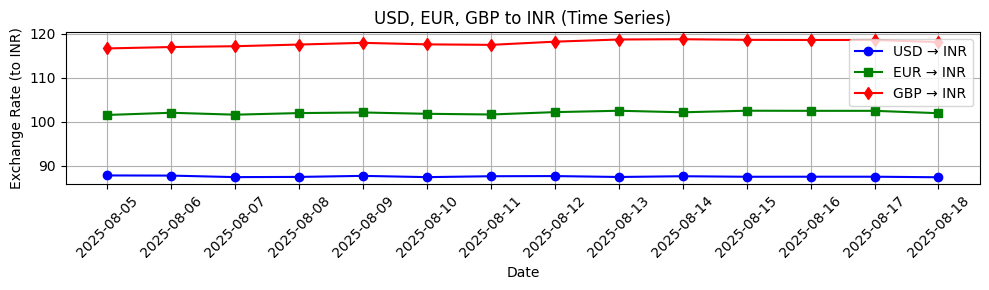

In [103]:
plt.figure(figsize=(10, 3))

colors = {
    "USD": "blue",
    "EUR": "green",
    "GBP": "red"
}

markers = {
    "USD": "o",
    "EUR": "s",
    "GBP": "d"
}

for base, values in results.items():
    dates = list(values.keys())
    rates = list(values.values())
    plt.plot(dates, rates, marker=markers.get(base, "o"), linestyle="-", label=f"{base} → INR", color=colors.get(base, "black"))

plt.xticks(rotation=45)
plt.title("USD, EUR, GBP to INR (Time Series)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate (to INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()